In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, proj3d

In [2]:
#draw a vector
from matplotlib.patches import FancyArrowPatch 

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [3]:
t = np.linspace(0,2*np.pi, 40)

In [4]:
# Position Equation
def rx(t):
    return t * np.cos(t)
def ry(t):
    return t * np.sin(t)

In [5]:
# Velocity Vectors
def vx(t):
    return np.cos(t) - t*np.sin(t)
def vy(t):
    return np.sin(t) + t*np.cos(t)

In [6]:
# Acceleration Vectors
def ax(t):
    return -2*np.sin(t) - t*np.cos(t)

def ay(t):
    return 2*np.cos(t) - t*np.sin(t)

<IPython.core.display.Javascript object>


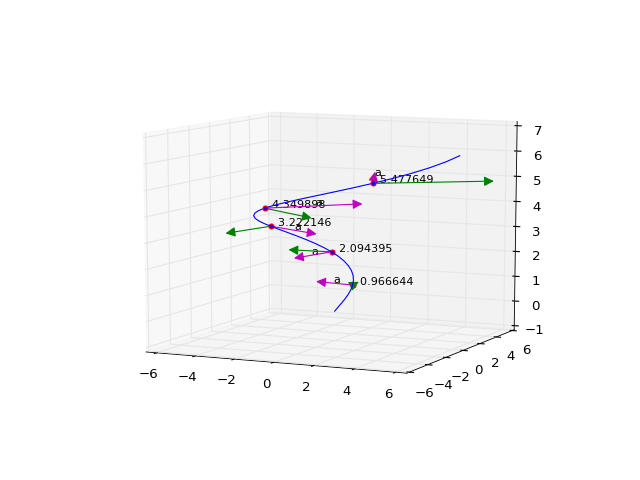

In [10]:
fig = plt.figure()
axes = fig.gca(projection='3d')

t_step = 7
for t_pos in range(t_step-1, len(t)-1, t_step):
    t_val_start = t[t_pos]
#     t_val_end = t[t_pos+1]

    vel_start = [rx(t_val_start), ry(t_val_start), t_val_start]
    vel_end = [rx(t_val_start)+vx(t_val_start), ry(t_val_start)+vy(t_val_start), t_val_start]
    vel_vecs = list(zip(vel_start, vel_end))
    vel_arrow = Arrow3D(vel_vecs[0],vel_vecs[1],vel_vecs[2], mutation_scale=20, lw=1, arrowstyle="-|>", color="g")
    axes.add_artist(vel_arrow)
    
    acc_start = [rx(t_val_start), ry(t_val_start), t_val_start]
    acc_end = [rx(t_val_start)+ax(t_val_start), ry(t_val_start)+ay(t_val_start), t_val_start]
    acc_vecs = list(zip(acc_start, acc_end))
    acc_arrow = Arrow3D(acc_vecs[0],acc_vecs[1],acc_vecs[2], mutation_scale=20, lw=1, arrowstyle="-|>", color="m")
    axes.add_artist(acc_arrow)
    
    axes.scatter(rx(t_val_start),ry(t_val_start),t_val_start,color='r') 
    axes.text(rx(t_val_start),ry(t_val_start),t_val_start,'{:>10f}'.format(t_val_start), size=10, zorder=1, color='k') 

    a_text_loc = [rx(t_val_start)+ax(t_val_start)/2, ry(t_val_start)+ay(t_val_start)/2, t_val_start]
    axes.text(a_text_loc[0],a_text_loc[1],a_text_loc[2],'a', size=10, zorder=1, color='k')

In [11]:
axes.plot(rx(t), ry(t), t)
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-6,6)
# ax.legend()

(-6, 6)

In [9]:
start = [vx(t[0]), vy(t[0]), t[0]]
end = [vx(t[len(t)-1]), vy(t[len(t)-1]), t[len(t)-1]]